# Problem statement:
Suppose that we have purchased bonds of 'Apple' worth 200000 dollars and have given a committment to the company worth another 200000. We need to calculate the expected loss of this portfolio now. 

Summary:

Outstanding(Bond) = 200000 dollars <br/>
Committment(Future) = 200000 dollars

### Some background theory
#### We know the following equation for Expected loss of a portfolio :
Expected loss(EL) = Exposure at default(EAD) x Probability of default(PD) x Loss given default(LGD)

Hence we need to find each of the three elements EAD, PD and LGD using different models in order to calculated our EL

## PREPROCESSING: First of all, let us fetch the balance sheet data from the API 

In [80]:
# Import libraries and build the API url
try:
    from urllib.request import urlopen
except ImportError:
    from urllib2 import urlopen

import json

key = '<enter your API key here>'

url = 'https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/APPL?period=quarter&datatype=csv&apikey={}'.format(key)

url

'https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/AAPL?period=quarter&datatype=csv&apikey=b351ae3cf257107a6016db549ff6cfc0'

In [81]:
# Function to fetch the data as a JSON file
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = (url)
data = get_jsonparsed_data(url)

In [82]:
# Check the JSON file structure
import pandas as pd
df = pd.DataFrame(columns = list(data['financials'][0]))
data['financials'][1]['date']

'2019-12-28'

In [100]:
data['financials'][0]

{'date': '2020-03-28',
 'Cash and cash equivalents': '40174000000.0',
 'Short-term investments': '53877000000.0',
 'Cash and short-term investments': '94051000000.0',
 'Receivables': '15722000000.0',
 'Inventories': '3334000000.0',
 'Total current assets': '1.43753e+11',
 'Property, Plant & Equipment Net': '35889000000.0',
 'Goodwill and Intangible Assets': '0.0',
 'Long-term investments': '98793000000.0',
 'Tax assets': '0.0',
 'Total non-current assets': '1.76647e+11',
 'Total assets': '3.204e+11',
 'Payables': '32421000000.0',
 'Short-term debt': '10392000000.0',
 'Total current liabilities': '96094000000.0',
 'Long-term debt': '89086000000.0',
 'Total debt': '99478000000.0',
 'Deferred revenue': '5928000000.0',
 'Tax Liabilities': '0.0',
 'Deposit Liabilities': '0.0',
 'Total non-current liabilities': '1.45881e+11',
 'Total liabilities': '2.41975e+11',
 'Other comprehensive income': '43708013000',
 'Retained earnings (deficit)': '33182000000.0',
 'Total shareholders equity': '78425

In [84]:
# Build the balance sheet data as a dataframe
df['date'] = [data['financials'][i]['date'] for i in range(len(data['financials']))]
df['Total current assets'] = [data['financials'][i]['Total current assets'] for i in range(len(data['financials']))]
df['Total liabilities'] = [data['financials'][i]['Total liabilities'] for i in range(len(data['financials']))]
df['Total non-current assets'] = [data['financials'][i]['Total non-current assets'] for i in range(len(data['financials']))]                                                       
df['Total assets'] = [data['financials'][i]['Total assets'] for i in range(len(data['financials']))]
df['Total current liabilities'] = [data['financials'][i]['Total current liabilities'] for i in range(len(data['financials']))]
df['Total liabilities'] = [data['financials'][i]['Total liabilities'] for i in range(len(data['financials']))]
df['Total current liabilities'] = [data['financials'][i]['Total current liabilities'] for i in range(len(data['financials']))]
df['Total non-current liabilities'] = [data['financials'][i]['Total non-current liabilities'] for i in range(len(data['financials']))]
                                                        

In [85]:
# Save the dataframe as a csv file for further use
df = df.dropna(axis=1)
df.to_csv('C:/Users/Manik Hindwan/Documents/Manik_Personal/Lockdown - Quarantine/Business/Domain Knowledge/Finance/Risk modelling/model_data.csv'
          , index = False
          ,encoding='utf-8')

## EAD MODEL: Internal credit risk model by Michael Ong

In [86]:
# Reading the saved balance sheet data
df = pd.read_csv('./model_data.csv')
df.head()

,date,Total current assets,Total non-current assets,Total assets,Total current liabilities,Total non-current liabilities,Total liabilities
0,2020-03-28,1.437530e+11,1.766470e+11,3.204000e+11,9.609400e+10,1.458810e+11,2.419750e+11
1,2019-12-28,1.632310e+11,1.773870e+11,3.406180e+11,1.021610e+11,1.489260e+11,2.510870e+11
2,2019-09-28,1.628190e+11,1.756970e+11,3.385160e+11,1.057180e+11,1.423100e+11,2.480280e+11
3,2019-06-29,1.349730e+11,1.872660e+11,3.222390e+11,8.970400e+10,1.360790e+11,2.257830e+11
4,2019-03-30,1.233460e+11,2.186520e+11,3.419980e+11,9.377200e+10,1.423660e+11,2.361380e+11


#### Exposure at default comprises of two non risk-averse parts:
1. Outstanding (Bonds)
2. Committment x Usage given default

Hence we would need to first calculate the Usage given default(UGD)

Upon checking Apple's website, we find that the credit rating for the company is AA+ which accounts for 73% of UGD

In [87]:
# Let us assign the necessary variables
bond = 200000
comt = 200000
ugd = 0.73

ead = bond + (ugd*comt)
print("The exposure at default(EAD) is:", ead)

The exposure at default(EAD) is: 346000.0


## PD MODEL: Merton Structural model

In [88]:
# Let us create a new column which we can use for plotting
import numpy as np
df['quarterspan'] = [i/4+0.25 for i in range(len(df))]
df['quarterspan'] = df[['quarterspan']].shift(1)
df['quarterspan'] = df['quarterspan'].replace(np.NaN,0)

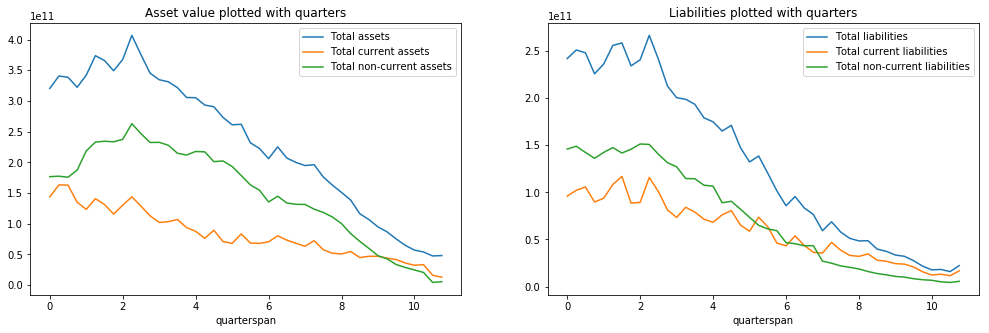

In [90]:
# Let us plot the assets and liabilities per quarter to see the trend
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
ax0.set_title("Asset value plotted with quarters")
ax1.set_title("Liabilities plotted with quarters")

df.plot(kind = 'line', x = 'quarterspan', y = ['Total assets','Total current assets','Total non-current assets'], ax=ax0, 
       figsize = (17,5))
df.plot(kind = 'line', x = 'quarterspan', y = ['Total liabilities','Total current liabilities','Total non-current liabilities'],
        figsize = (17,5),ax=ax1)
plt.show()

We will now proceed to assign and calculate the values which will be used in the merton structural model calculations

In [102]:
# Calculating some essential measures for the model
firm_value = df[['Total assets']].iloc[0,0]
rate = 6.25/100
time = 1
volatility =  df['Total assets'].std(ddof=1) / df['Total assets'].mean()
print("The firm value is {} and the rate of interest is {}% and the volatility according \
to asset levels is {}%".format(firm_value, rate*100, round(volatility * 100, 2)))

The firm value is 320400000000.0 and the rate of interest is 6.25% and the volatility according to asset levels is 46.79%


In [103]:
stl = max(df['Total current liabilities'])
ltl = max(df['Total non-current liabilities'])
default_pt = stl + (0.5*ltl)
print("If the company's total assets hit {} , it will default".format(default_pt))

If the company's total assets hit 192518000000.0 , it will default


In [104]:
df.columns

Index(['date', 'Total current assets', 'Total non-current assets',
       'Total assets', 'Total current liabilities',
       'Total non-current liabilities', 'Total liabilities', 'quarterspan'],
      dtype='object')

Now we will calculate the distance to default

In [105]:
import math
numerator = math.log(firm_value/default_pt) + ((rate - np.power(volatility,2)/2)*time)
denominator = volatility*time
dd = numerator/denominator
from scipy.stats import norm
PD = norm.cdf(-dd)
print("The probability of default(PD) as per the Merton structural model is {}%".format(round(100* PD,2)))

The probability of default(PD) as per the Merton structural model is 16.15%


## LGD MODEL: Gamma distribution

According to Moody's ultimate recovery database, for bonds the LGD mean is around 56.37% and the standard error is 1.04%

We also learned from an article from Moody's that the maximum value of the distribution for a bond is set to 1.1

In [122]:
# Calculating the alpha and beta values of the beta distribution 
mu = 0.5637
dev = 0.0104
maxm = 1.1

alpha = mu/maxm * (mu*(maxm - mu)/(maxm * np.power(dev,2))-1)
beta = alpha*(maxm/mu-1)
print("The alpha is {} and the beta value is {}".format(round(alpha,2),round(beta,2)))

The alpha is 1301.61 and the beta value is 1238.34


In [128]:
# Calculating the LGD ( LGD = 1 -mean_recovery)
mean_recovery = alpha/(alpha+beta)
LGD = 1-mean_recovery
print("The loss given default(LGD) is {}%".format(round(100*LGD,2)))

The loss given default(LGD) is 48.75%


## CALCULATING EXPECTED LOSS

Expected loss(EL) = EAD x PD x LGD

In [130]:
print("The expected loss of our portfolio is ${}".format(round(ead*PD*LGD,2)))

The expected loss of our portfolio is $27250.42
